In [1]:
include("../contingency_tables.jl")
using ProgressMeter, Dates, Plots, Statistics
Random.seed!(2025)

TaskLocalRNG()

In [2]:
T1 = [68   20    15     5;
    119   84    54    29;
    26   17    14    14;
    7   94    10    16]

T2 = [2161 3577 2184 1636;
    2755 5081 2222 1052;
    936 1753 640 306;
    225 419 96 38;
    39 98 31 14]

n1 = sum(T1)
n2 = sum(T2)
d = log2(n2)-log2(n1)

5.415284984325888

In [3]:
K = 15
K0 = 8
ks = K0:K
reps = 10000
times = zeros(Real, length(ks))
ns = zeros(Int, length(ks))

for i in 1:length(ks)
    T = T1 .* 2^ks[i]
    ns[i] = sum(T)
    start = now()
    for _ in 1:reps
        T = lumped_burnside_step(T)
    end
    finish = now()
    times[i] = (finish - start).value / 1e3  # Convert to seconds

    println("Run ", i, " of ", length(ks),". Time: ", times[i])
end


times_2 = zeros(Real, length(ks))
ns_2 = zeros(Int, length(ks))

for i in 1:length(ks)
    T = T2 .* Int(floor(2^(ks[i]-d)))
    ns_2[i] = sum(T)
    start = now()
    for _ in 1:reps
        T = lumped_burnside_step(T)
    end
    finish = now()
    times_2[i] = (finish - start).value / 1e3  # Convert to seconds

    println("Run ", i, " of ", length(ks),". Time: ", times_2[i])
end

Run 1 of 8. Time: 26.864
Run 2 of 8. Time: 29.205
Run 3 of 8. Time: 35.046
Run 4 of 8. Time: 38.505
Run 5 of 8. Time: 41.178
Run 6 of 8. Time: 37.689
Run 7 of 8. Time: 42.267
Run 8 of 8. Time: 51.981
Run 1 of 8. Time: 35.817
Run 2 of 8. Time: 35.994
Run 3 of 8. Time: 39.866
Run 4 of 8. Time: 49.941
Run 5 of 8. Time: 58.241
Run 6 of 8. Time: 54.481
Run 7 of 8. Time: 64.118
Run 8 of 8. Time: 73.215


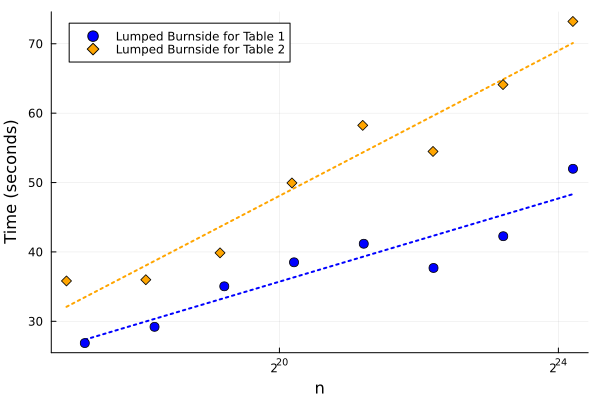

In [4]:
x1 = log2.(ns)
x2 = log2.(ns_2)
y1 = times
y2 = times_2
b1 = cov(x1,y1)/var(x1)
b2 = cov(x2,y2)/var(x2)
a1 = mean(y1) - mean(x1)*b1
a2 = mean(y2) - mean(x2)*b2

fit1 = b1 .* x1 .+ a1
fit2 = b2 .* x2 .+ a2

plt = plot(ns, fit1, label = nothing, lw = 2, linestyle = :dot, color =:blue, xscale =:log2, legend =:topleft)
plot!(plt, ns_2, fit2, label = nothing, lw = 2, linestyle = :dot, color =:orange)

scatter!(plt, ns, times, label = "Lumped Burnside for Table 1", marker = (:circle, 5), color = :blue)
scatter!(plt, ns_2, times_2, label = "Lumped Burnside for Table 2", marker = (:diamond, 5), color = :orange)

xlabel!(plt, "n")
ylabel!(plt, "Time (seconds)")
savefig(plt, "../Figures/tables_times.pdf")
plt